## Import Libraries


In [2]:
import numpy as np
import pandas as pd
import os
import shutil
import time
import h5py
import matplotlib.pyplot as plt
from scipy.special import expit, logit
from subprocess import Popen

## Create New Folder

In [3]:
loc = f'./../../files/BC_IC_files/Run_{int(time.time())}'
print(loc)


./../../files/BC_IC_files/Run_1635134902


In [4]:
src = './files/Files_to_change'

In [5]:
shutil.copytree(src, loc)

'./../../files/BC_IC_files/Run_1635134902'

In [6]:
# loc = 'Run_1586917171'

## Open h5 file to be changed

In [7]:
file_name = f'./{loc}/6_months_run.h5'

f1 = h5py.File(file_name, 'r+') 

## The field that has to be changed

In [8]:
m = 0
n = 4

level1 = list(f1.keys())
level2 = list(f1[level1[m]].keys())

print(level1[m])
print(level2[n])

Data_Starting_Head = f1[level1[m]][level2[n]]

############################
m = 14
n = 6


level1 = list(f1.keys())
level2 = list(f1[level1[m]].keys())

print(level1[m])
print(level2[n])

Data_Specified_Head = f1[level1[m]][level2[n]]


Arrays
StartHead1
Specified Head
07. Property


In [9]:
n=1
print(level2[n])
Data_use_last = f1[level1[m]][level2[n]]


01. Use Last


In [10]:
############################
m = 0
n = 3


level1 = list(f1.keys())
level2 = list(f1[level1[m]].keys())

print(level1[m])
print(level2[n])

SY1 = f1[level1[m]][level2[n]]

Arrays
SY1


In [11]:
def print_values(f,key=None):
    
    try:
        print(key)
        print(f[:])
        
    except:
        for key in list(f.keys()):
            print_values(f[key],key)
    
    

In [12]:
print_values(f1)

None
Arrays
HANI1
[1. 1. 1. ... 1. 1. 1.]
HK1
[1.e-05 1.e-05 1.e-05 ... 1.e-05 1.e-05 1.e-05]
SS1
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
SY1
[1.e-09 1.e-09 1.e-09 ... 1.e-09 1.e-09 1.e-09]
StartHead1
[1.30581266 1.28508548 1.26435829 ... 0.03489728 0.01744864 0.        ]
VANI1
[3. 3. 3. ... 3. 3. 3.]
bot1
[-2. -2. -2. ... -2. -2. -2.]
ibound1
[ 1  1  1 ...  1  1 -1]
top1
[8. 8. 8. ... 8. 8. 8.]
Drain
00. Number of BCs
[0]
01. Use Last
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
02. Cell IDs
[0]
03. Name
[0]
04. Map ID
[0]
06. IFACE
[0]
07. Property
[[[0.]]

 [[0.]]

 [[0.]]

 [[0.]]]
Drain Return
00. Number of BCs
[0]
01. Use Last
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1

## Export Data

In [13]:

Data_Starting_Head_values = Data_Starting_Head[:]

Data_Specified_Head_values = Data_Specified_Head[:]

In [14]:
Data_SY1 = SY1[:]

In [15]:
Data_Specified_Head_values.shape

(6, 64, 180)

In [16]:
Data_Starting_Head_values.shape

(4096,)

In [17]:
N_x = 64
N_t = 180

In [18]:
X_1_par = np.arange(N_x)-(N_x-1)/2
t_norm = np.arange(N_t+1)-(N_t)/2


time_multiplier = (np.exp(-t_norm/50))/30 
H = (expit(-X_1_par/10)) /2 +0.2

In [19]:
H

array([0.67945436, 0.67739126, 0.67513174, 0.67265934, 0.66995667,
       0.6670055 , 0.66378676, 0.66028073, 0.65646711, 0.65232527,
       0.64783439, 0.64297381, 0.63772332, 0.63206355, 0.6259764 ,
       0.61944553, 0.61245687, 0.60499922, 0.59706481, 0.58864993,
       0.57975546, 0.57038745, 0.56055759, 0.55028357, 0.53958935,
       0.52850523, 0.5170678 , 0.50531962, 0.49330879, 0.48108825,
       0.46871492, 0.4562487 , 0.4437513 , 0.43128508, 0.41891175,
       0.40669121, 0.39468038, 0.3829322 , 0.37149477, 0.36041065,
       0.34971643, 0.33944241, 0.32961255, 0.32024454, 0.31135007,
       0.30293519, 0.29500078, 0.28754313, 0.28055447, 0.2740236 ,
       0.26793645, 0.26227668, 0.25702619, 0.25216561, 0.24767473,
       0.24353289, 0.23971927, 0.23621324, 0.2329945 , 0.23004333,
       0.22734066, 0.22486826, 0.22260874, 0.22054564])

In [20]:
BC_left = np.outer(H,time_multiplier) + 1

In [21]:
BC_left.shape

(64, 181)

In [22]:
BC_left = BC_left + (np.linspace(0.2,0,64)  * np.ones([181,64])).T

In [23]:
 np.ones([1,64])

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

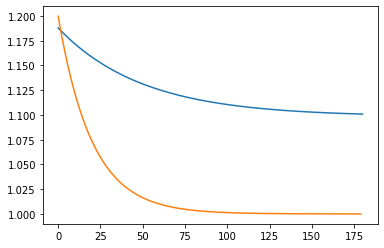

In [24]:
plt.plot(BC_left[32,:])
plt.plot(Data_Specified_Head_values[0,32,:])


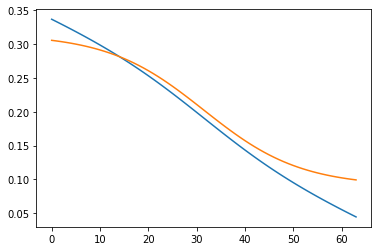

In [25]:
plt.plot(BC_left[:,0]-1)
plt.plot(Data_Specified_Head_values[0,:,0]-1)

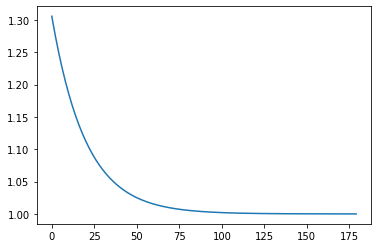

In [26]:
plt.plot(Data_Specified_Head_values[0,0,:])

In [27]:
N = 64
end = np.zeros(N)


IC = np.linspace(BC_left[:,0],end,N,axis=1).reshape(-1)

In [28]:
Data_Starting_Head_values = IC

In [29]:
Data_Specified_Head_values[0,:,:] = BC_left[:,0:-1]
Data_Specified_Head_values[1,:,:] = BC_left[:,1:]

In [30]:
# Data_use_last[...] = Data_use_last[:]# * 0

In [31]:
# SY1[...] = Data_SY1 #+ 0.003

In [32]:
Data_Specified_Head[...] = Data_Specified_Head_values
Data_Starting_Head[...] = Data_Starting_Head_values

f1.close() 

In [33]:
f1 = h5py.File(file_name, 'r+') 

In [34]:
# Data_Specified_Head_values[0,:,:]

In [35]:
# np.max(BC_left[:,1:] - check)

## Run the experiment

In [36]:
p = Popen(['mf2k_h5','6_months_run.mfn'],  cwd=f'./{loc}/',shell=True)
p.communicate()

(None, None)

## Load Results

In [37]:
Ntsteps = 1800
Ninterfaces = 63
Nx = 64
Ny = Nx
Nr = 100
L = 1.
dx = L/Nx
dy = dx

k=np.zeros(Nx*Ny)
qcell = np.zeros((Ny,Ntsteps))
q = np.zeros((Nr,Ntsteps))

HMC = np.zeros((Nr+2,Nx,Ntsteps))

In [38]:
# loc = 'Run_1586995394'

In [39]:
f = open(f'./{loc}/6_months_run.hed')

hmc = np.loadtxt(f)

In [40]:
P = hmc.reshape((Ntsteps,64,64))

In [41]:
P.shape

(1800, 64, 64)

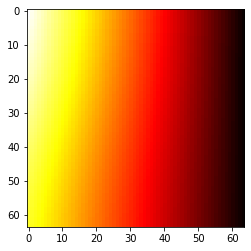

In [42]:
plt.imshow(P[0,:,:], cmap='hot', interpolation='nearest')

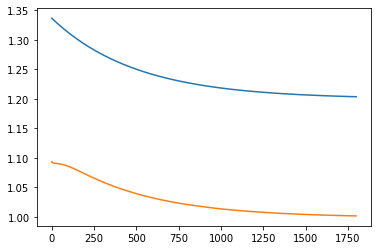

In [43]:
plt.plot(P[:,0,0])
plt.plot(P[:,10,10])

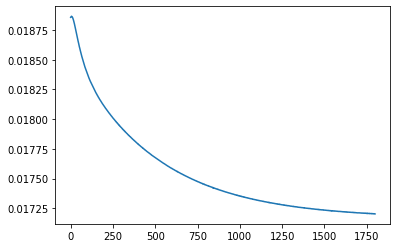

In [44]:
check = P[:,32,32]-P[:,32,33]
plt.plot(check)

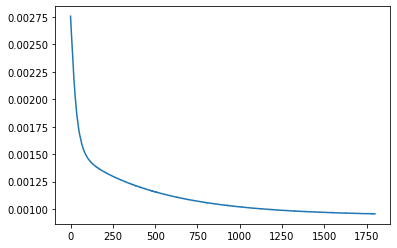

In [45]:
check = P[:,32,32]-P[:,33,32]
plt.plot(check)

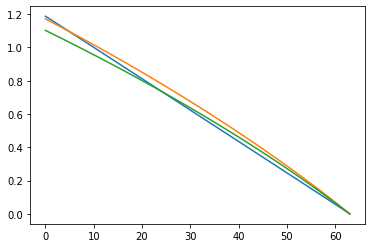

In [46]:
plt.plot(P[0,32,:])
plt.plot(P[100,32,:])
plt.plot(P[1500,32,:])

In [57]:
x = np.linspace(0,1000,64)
y = np.linspace(0,1000,64)

0


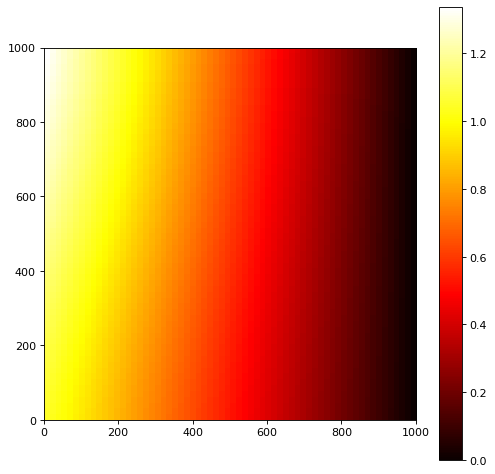

In [64]:
my_dpi =80
fig, axs = plt.subplots(1, 1, figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)

tt =0 
print(int(tt))
t = int(tt)
extent = 0,1000,0,1000
plt.imshow(P[t,:,:], cmap='hot', interpolation='nearest',extent=extent)
plt.colorbar()
plt.show()


0


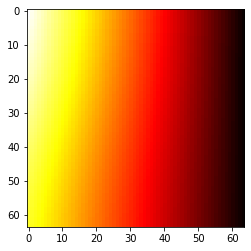

100


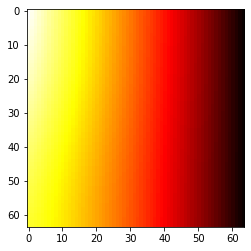

200


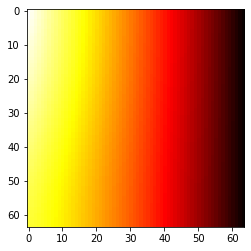

300


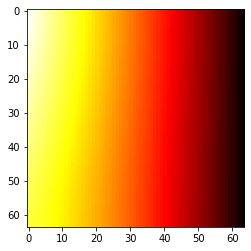

400


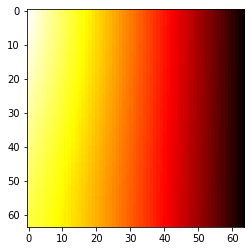

500


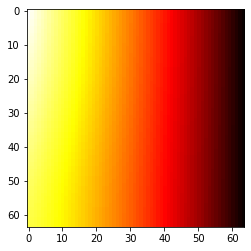

600


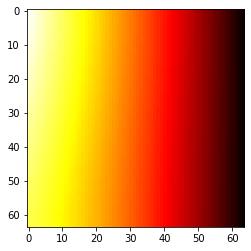

700


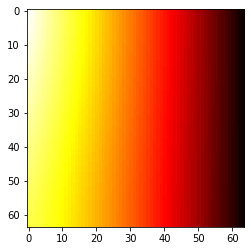

800


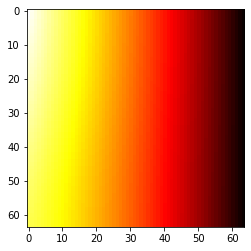

900


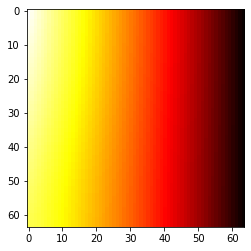

1000


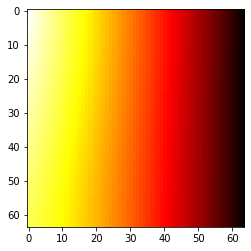

1100


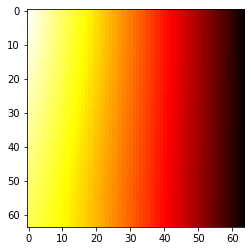

1200


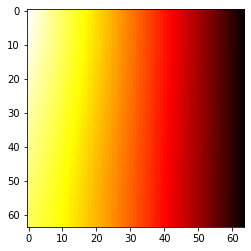

1300


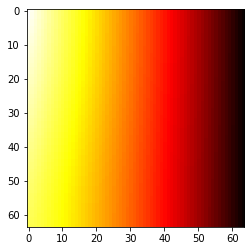

1400


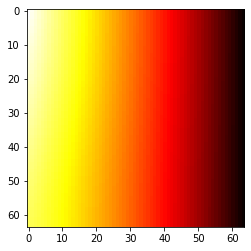

1500


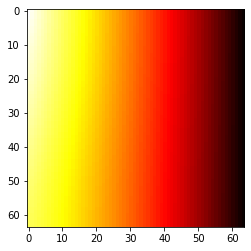

1600


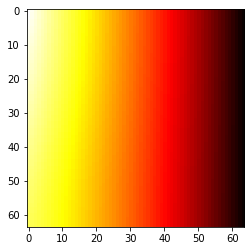

1700


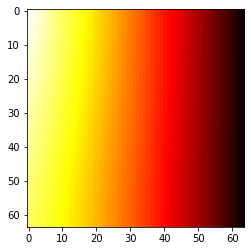

In [47]:
for tt in np.arange(0,1800,100):
    print(int(tt))
    t = int(tt)
    plt.imshow(P[t,:,:], cmap='hot', interpolation='nearest')
    plt.show()

0


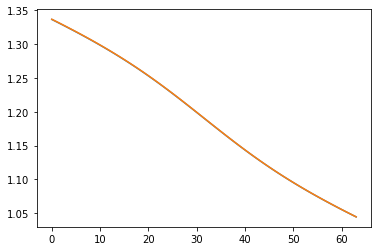

10


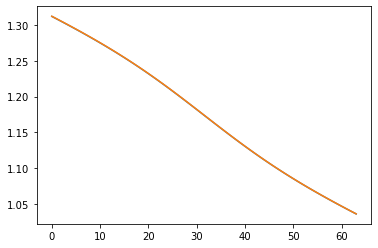

20


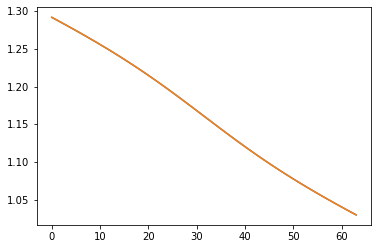

30


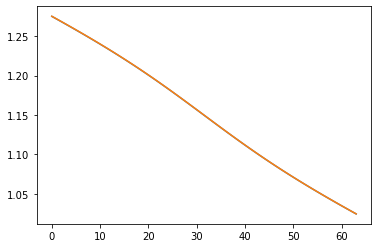

40


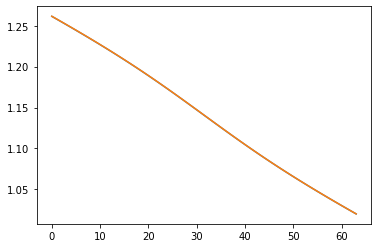

50


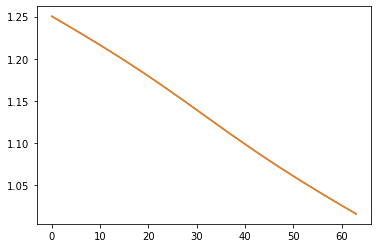

60


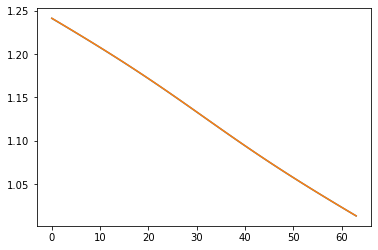

70


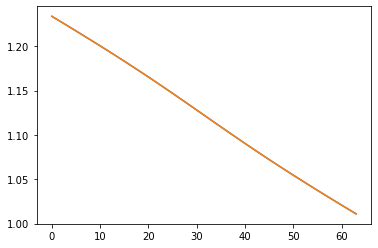

80


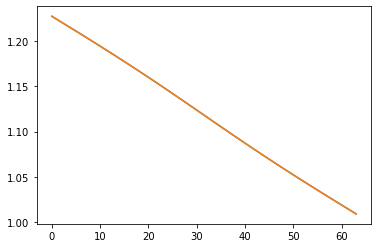

90


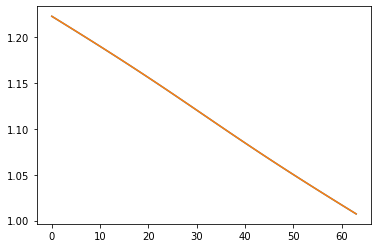

100


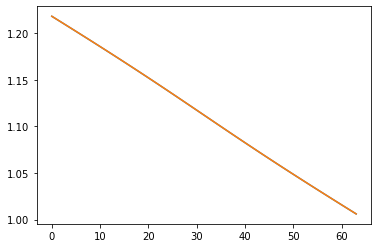

110


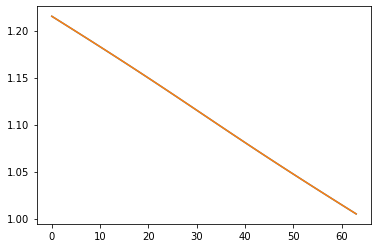

120


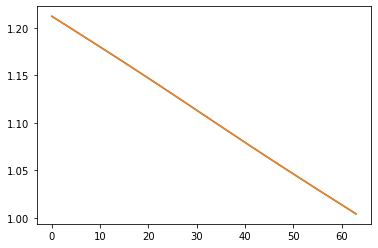

130


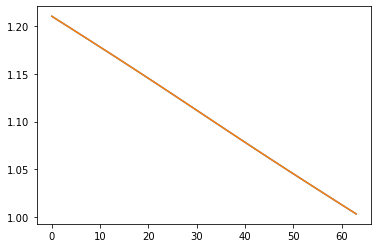

140


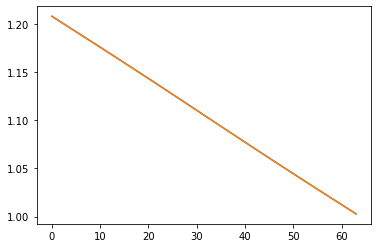

150


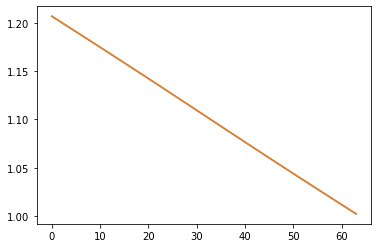

160


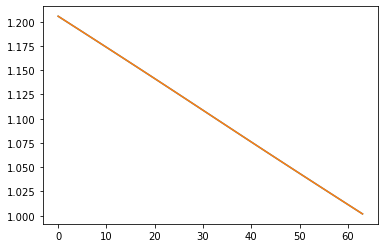

170


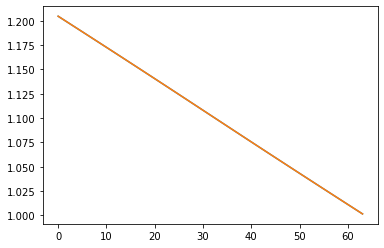

In [46]:
for tt in np.arange(0,180,10):
    print(int(tt))
    t = int(tt)
    plt.plot(P[t*10,:,0])
    plt.plot(Data_Specified_Head_values[0,:,t])

    plt.show()

In [47]:
loc

'./../../files/BC_IC_files/Run_1623326552'